In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
day1 = pd.read_csv('R4_day1.csv',delimiter=';',header=0)
day2 = pd.read_csv('R4_day2.csv',delimiter=';',header=0)
day3 = pd.read_csv('R4_day3.csv',delimiter=';',header=0)
combine_df = pd.concat([day1,day2,day3]).reset_index(drop=True)

# Black Scholes Calculator

In [10]:
import numpy as np
from scipy.stats import norm

In [11]:
def bs_optionpricing(S, K, sigma, r, T, delta, option_type="call"):
    
    assert option_type in ["call", "put"], "option_type only accepts 'call' or 'put' as argument"
    
    d1 = (np.log(S/K) + (r-delta+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if option_type == "call":
        price = S*np.exp(-delta*T)*norm.cdf(d1,0,1) - K*np.exp(-r*T)*norm.cdf(d2,0,1)
        
        print("To dynamically replicate payoff of the call at expiration,")
        print("Delta: ", np.exp(-delta*T)*norm.cdf(d1,0,1))
        print("B:", -K*np.exp(r*T)*norm.cdf(d2,0,1))
        
    elif option_type == "put":
        price = K*np.exp(-r*T)*norm.cdf(-d2,0,1) - S*np.exp(-delta*T)*norm.cdf(-d1,0,1)
        
        print("To dynamically replicate payoff of the put at expiration,")
        print("Delta: ", -np.exp(-delta*T)*norm.cdf(d1,0,1))
        print("B:", K*np.exp(r*T)*norm.cdf(d2,0,1))

    return price

In [127]:
norm.cdf(0.5,0,1)

0.6914624612740131

In [136]:
statistics.NormalDist(mu=0.0, sigma=1.0).cdf(0.5)

0.691462461274013

# Visualizations

<Axes: >

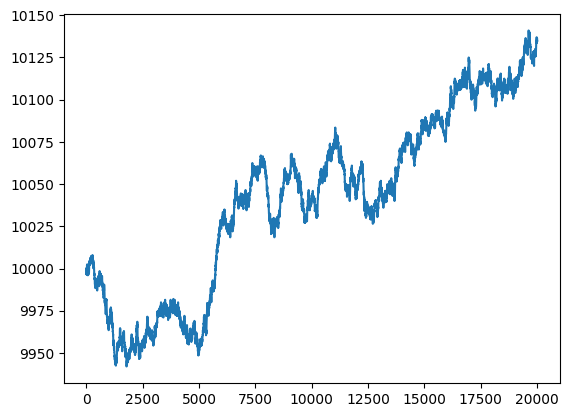

In [43]:
day1[day1['product']=='COCONUT']['mid_price'].plot()

<Axes: >

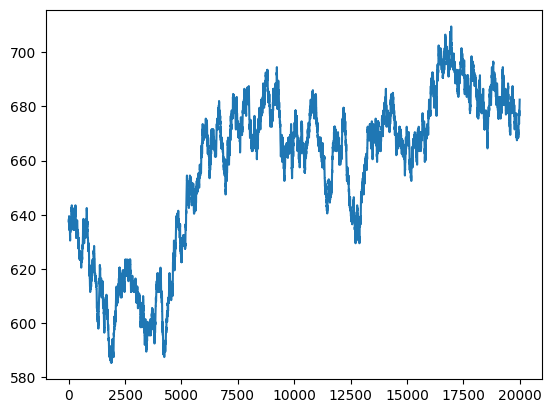

In [46]:
day1[day1['product']=='COCONUT_COUPON']['mid_price'].plot()

# Asymtotic Analysis

In [110]:
day1[day1['product']=='COCONUT']['mid_price'].iloc[-1] - day1[day1['product']=='COCONUT_COUPON']['mid_price'].iloc[-1]

9452.5

In [111]:
day2[day2['product']=='COCONUT']['mid_price'].iloc[-1] - day2[day2['product']=='COCONUT_COUPON']['mid_price'].iloc[-1]

9369.5

In [112]:
day3[day3['product']=='COCONUT']['mid_price'].iloc[-1] - day3[day3['product']=='COCONUT_COUPON']['mid_price'].iloc[-1]

9307.0

By asymtotic analysis,

Day 1 fair strike price = 9452.5

Day 2 fair strike price = 9369.5

Day 3 fair strike price = 9307.0


# Statistical Interference

1. Assume 1 imc day = 1 month, 500 tick = 1 day

2. Assume 1 imc day = 1 imc day, might be harder to do statistical interference

Assume we are in Black Scholes Framework, but there may be mispricing -> mean reverting signals?

What do we need: 
1. sigma - annual volatility

(10000*256)^1/2 * std(log(n+1/n))

2. r - interest rate (assume 2%?)
3. Stock price (given)
4. T (given)
5. K - target

In [41]:
# (10000*256)^1/2 * std(log(n+1/n))

price_coco = combine_df[combine_df['product']=='COCONUT']['mid_price'].reset_index(drop=True)
tmr_price_coco = price_coco.shift(-1)

sigma = np.std(np.log(tmr_price_coco/price_coco))*np.sqrt(10000*256)
# 0.16470068468479618

# Black Scholes Statistical Interference on K

sigma = 0.16470068468479618 (compounded ret), 0.16090022222584424 (binary IV), 0.15927902349853476 (newton rapson IV)

r = 0.02

T = 10000-t/365*10000

S = St

K = ?

In [63]:
price_coco = combine_df[combine_df['product']=='COCONUT']['mid_price'].reset_index(drop=True)

In [64]:
price_coco_df = pd.DataFrame(price_coco)

In [431]:
def bs_optionpricing(S, K, sigma, r, T, option_type="call"):
    
        assert option_type in ["call", "put"], "option_type only accepts 'call' or 'put' as argument"
        
        d1 = (np.log(S/K) + (r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        
        if option_type == "call":
            price = S*statistics.NormalDist(mu=0.0, sigma=1.0).cdf(d1) - K*np.exp(-r*T)*statistics.NormalDist(mu=0.0, sigma=1.0).cdf(d2)
            delta = statistics.NormalDist(mu=0.0, sigma=1.0).cdf(d1)
            # print("To dynamically replicate payoff of the call at expiration,")
            # print("Delta: ", np.exp(-delta*T)*NormalDist(mu=0.0, sigma=1.0).cdf(d1))
            # print("B:", -K*np.exp(r*T)*NormalDist(mu=0.0, sigma=1.0).cdf(d2))
            
        # elif option_type == "put":
        #     price = K*np.exp(-r*T)*NormalDist.cdf(-d2,0,1) - S*np.exp(-delta*T)*NormalDist.cdf(-d1)
            
            # print("To dynamically replicate payoff of the put at expiration,")
            # print("Delta: ", -np.exp(-delta*T)*NormalDist.cdf(d1,0,1))
            # print("B:", K*np.exp(r*T)*NormalDist.cdf(d2,0,1))

        return price, delta

In [466]:
def fair_optionprice(sigma):
    prediction = []
    for i,val in enumerate(option_underlying.values):
        K = 10000
        S = val[1]
        call_price = val[0]
        r = 0
        T = (250*10000-i)/(250*10000)
        prediction.append(bs_optionpricing(S,K,sigma,r,T)[0])
    return prediction

In [453]:
true_optionprice = combine_df[combine_df['product']=='COCONUT_COUPON']['mid_price'].reset_index(drop=True)
diff_fair_true = pd.Series(prediction)-true_optionprice

In [454]:
diff_fair_true.mean()

-1.2513704268014885

In [455]:
diff_fair_true.std()

13.501006933007545

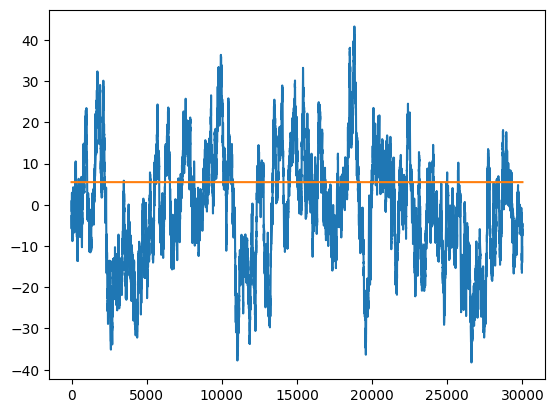

In [456]:
diff_fair_true.plot()
plt.plot(range(30000), [diff_fair_true.mean()+(diff_fair_true.std()*0.5)]*30000)

In [480]:
option_underlying['implied_vol'][0]

0.15996826171874962

## Split day analysis

In [481]:
prediction_day1 = fair_optionprice(0.15945317138671836) #option_underlying['implied_vol'].iloc[:10000].mean()
prediction_day2 = fair_optionprice(0.15872394873046833) #option_underlying['implied_vol'].iloc[10000:20000].mean()
prediction_day3 = fair_optionprice(0.15965995037841754) #option_underlying['implied_vol'].iloc[20000:30000].mean()
prediction_fair = fair_optionprice(0.15996826171874962)

In [482]:
diff_fair_true_1 = pd.Series(prediction_day1)-true_optionprice
diff_fair_true_2 = pd.Series(prediction_day2)-true_optionprice
diff_fair_true_3 = pd.Series(prediction_day3)-true_optionprice
diff_fair_true_fair = pd.Series(prediction_fair)-true_optionprice

In [472]:
diff_fair_true_1.mean()

-0.5619765617448474

In [475]:
diff_fair_true_1.std()

13.501951415244056

In [473]:
diff_fair_true_2.mean()

-3.4487436828612354

In [476]:
diff_fair_true_2.std()

13.498003245594932

In [474]:
diff_fair_true_3.mean()

0.2565899168132979

In [477]:
diff_fair_true_3.std()

13.503074180196188

In [483]:
diff_fair_true_fair.mean()

1.477081480644844

In [484]:
diff_fair_true_fair.std()

13.504750883260034

### Result log

**Base case (sigma: 0.15927902349853476, mean: -1.2513704268014885, std: 13.501006933007545)**

Day1: 108,339
Day2: 142,599
Day3: 210,123

**Day1 params: (sigma: 0.15945317138671836, mean: -0.5619765617448474, std: 13.501951415244056)**

Day1: 108,563
Day2: 144,844
Day3: 211,001

**Day2 params: (sigma: 0.15872394873046833, mean: -3.4487436828612354, std: 13.498003245594932)**

Day1: 108,563
Day2: 145,543
Day3: 210,374

**Day3 params: (sigma: 0.15965995037841754, mean: 0.2565899168132979, std: 13.503074180196188)**

Day1: 108,563
Day2: 144,844
Day3: 211,001

# BS model 2 (Trade on volatility)

Calculate realised volatility and implied volatility, and plot the difference

In [176]:
from scipy.optimize import fmin

def ImpliedVolatilityCall(s):
        d1 = ( (np.log(S/K)+(r+0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
        d2 = ( (np.log(S/K)+(r-0.5*s[0]**2)*T) / (s[0]*np.sqrt(T)) )
        of = ( -K*np.exp(-r*T)* statistics.NormalDist(0,1).cdf(d2)  + S* statistics.NormalDist(0,1).cdf(d1) ) - call_price
        val = of**2
        # print("[σ]=",s,", Object Function Value:", val)
        return(val)
    
def optimize_impliedvol(S,K,r,T,call_price):
    counter += 1
    return fmin(ImpliedVolatilityCall,[0.3])

In [162]:
option_price = combine_df[combine_df['product']=='COCONUT_COUPON']['mid_price'].reset_index(drop=True)

In [161]:
underlying = combine_df[combine_df['product']=='COCONUT']['mid_price'].reset_index(drop=True)

In [167]:
option_underlying = pd.concat([option_price, underlying],axis=1)
option_underlying.columns = ['COCONUT_COUPON','COCONUT']

In [ ]:
implied_vol_ = []
for i,val in enumerate(option_underlying.values):
    K = 10000
    S = val[1]
    call_price = val[0]
    r = 0
    T = ((10000-(i%10000))+245*10000)/(246*10000)
    implied_vol_.append(fmin(ImpliedVolatilityCall,[0.3],disp=0))

In [188]:
option_underlying['implied_vol'] = implied_vol_

In [189]:
option_underlying['implied_vol'] = option_underlying['implied_vol'].apply(lambda x: x[0])

<Axes: >

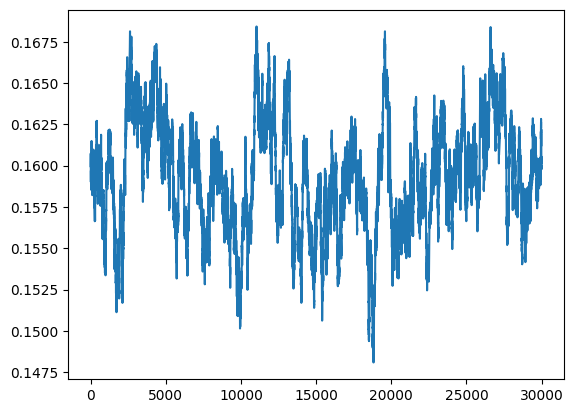

In [204]:
option_underlying['implied_vol'].plot()

In [193]:
# Compare adf test statistic
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(option_underlying['implied_vol'])
result1[1]

1.845233489412843e-08

In [203]:
result2 = adfuller(diff_fair_true)
result2[1]

1.897906052149244e-08

# Simple backtest

## 1. RSI signal on implied volatility

In [219]:
import talib
import bt

In [297]:
price_data = pd.DataFrame(option_underlying['implied_vol']*100)

price_data.columns = ['Close']
start_date = pd.Timestamp("2010-01-01")  # Replace with your desired start date
end_date = start_date + pd.Timedelta(days=29999)  # Replace with your desired end date
step = pd.Timedelta(days=1)
date_range = pd.date_range(start=start_date, end=end_date, freq=step)
price_data.index = date_range

stock_rsi = talib.RSI(price_data['Close']).to_frame()
signal = stock_rsi.copy()
signal[stock_rsi.isnull()]=0
signal[stock_rsi<30]=1
signal[stock_rsi>70]=-1
signal[(stock_rsi<70)&(stock_rsi>30)]=0
signal.columns = ['Close']

<Axes: >

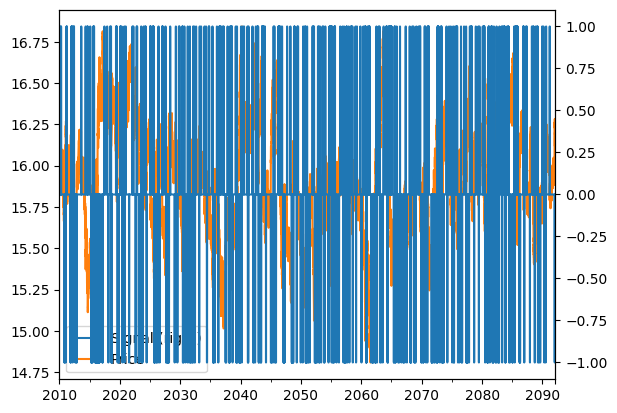

In [298]:
combined_df = bt.merge(signal, price_data['Close'])
combined_df.columns = ['Signal','Price']
combined_df.plot(secondary_y=['Signal'])

In [313]:
bt_strategy = bt.Strategy("RSI_MeanReversion", 
                          [bt.algos.WeighTarget(signal), 
                           bt.algos.Rebalance()])

In [314]:
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

<Axes: title={'center': 'Equity Progression'}>

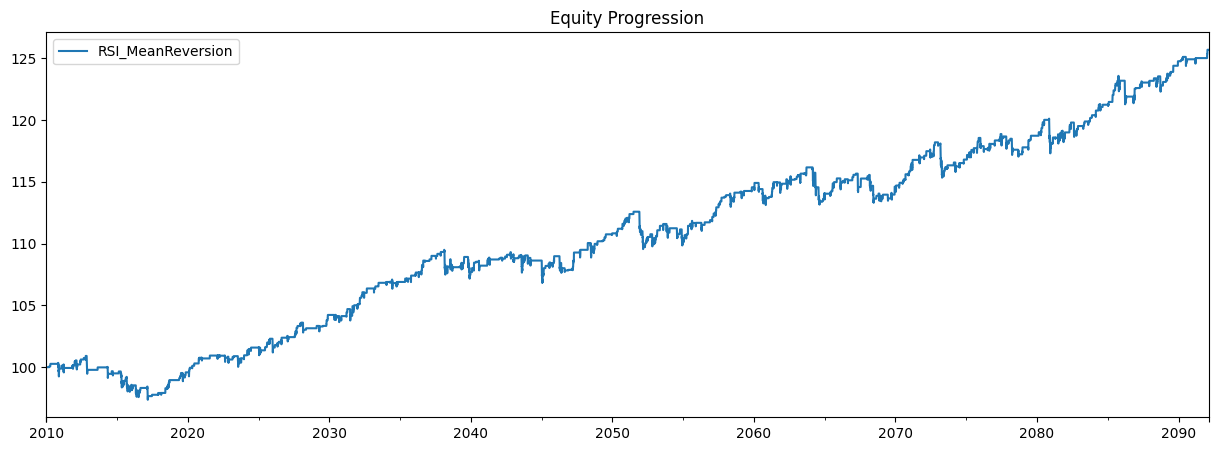

In [315]:
bt_result.plot()

In [288]:
bt_result.get_transactions()

,,price,quantity
Date,Security,,
2010-03-21,Close,15.906738,62866.0
2010-03-22,Close,15.918457,-62866.0
2010-04-15,Close,15.841553,63171.0
2010-04-16,Close,15.872314,-63171.0
2010-11-01,Close,15.845215,-63280.0
...,...,...,...
2092-01-08,Close,16.162354,77198.0
2092-01-12,Close,16.245117,-77163.0
2092-01-14,Close,16.238525,77163.0


## 2. RSI signal on price

In [ ]:
K = 10000
prediction = price_coco_df.apply(lambda x: bs_optionpricing(x,
                                            K,
                                            0.15927902349853476, 
                                            0.00,((10000-(x.index%10000))+245*10000)/(246*10000), 
                                            0))

In [291]:
diff_fair_true

0       -2.739692
1       -3.005658
2       -3.537275
3       -4.005916
4       -3.537533
           ...   
29995   -4.260793
29996   -3.758498
29997   -2.261049
29998   -2.009997
29999   -2.763474
Name: mid_price, Length: 30000, dtype: float64

In [293]:
price_data = pd.DataFrame(diff_fair_true+40)

price_data.columns = ['Close']
start_date = pd.Timestamp("2010-01-01")  # Replace with your desired start date
end_date = start_date + pd.Timedelta(days=29999)  # Replace with your desired end date
step = pd.Timedelta(days=1)
date_range = pd.date_range(start=start_date, end=end_date, freq=step)
price_data.index = date_range

stock_rsi = talib.RSI(price_data['Close']).to_frame()
signal = stock_rsi.copy()
signal[stock_rsi.isnull()]=0
signal[stock_rsi<30]=1
signal[stock_rsi>70]=-1
signal[(stock_rsi<70)&(stock_rsi>30)]=0
signal.columns = ['Close']

<Axes: >

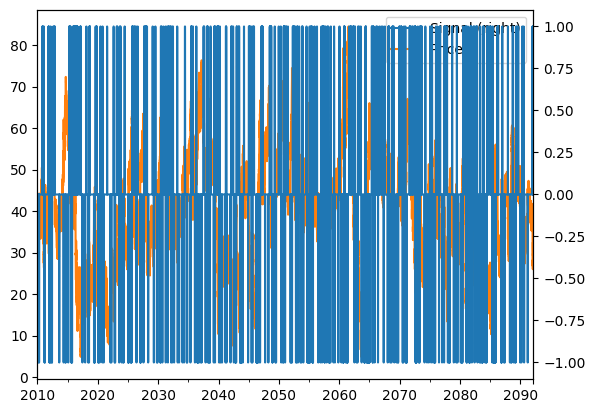

In [294]:
combined_df = bt.merge(signal, price_data['Close'])
combined_df.columns = ['Signal','Price']
combined_df.plot(secondary_y=['Signal'])

In [295]:
bt_strategy = bt.Strategy("RSI_MeanReversion", 
                          [bt.algos.WeighTarget(signal), 
                           bt.algos.Rebalance()])

bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

<Axes: title={'center': 'Equity Progression'}>

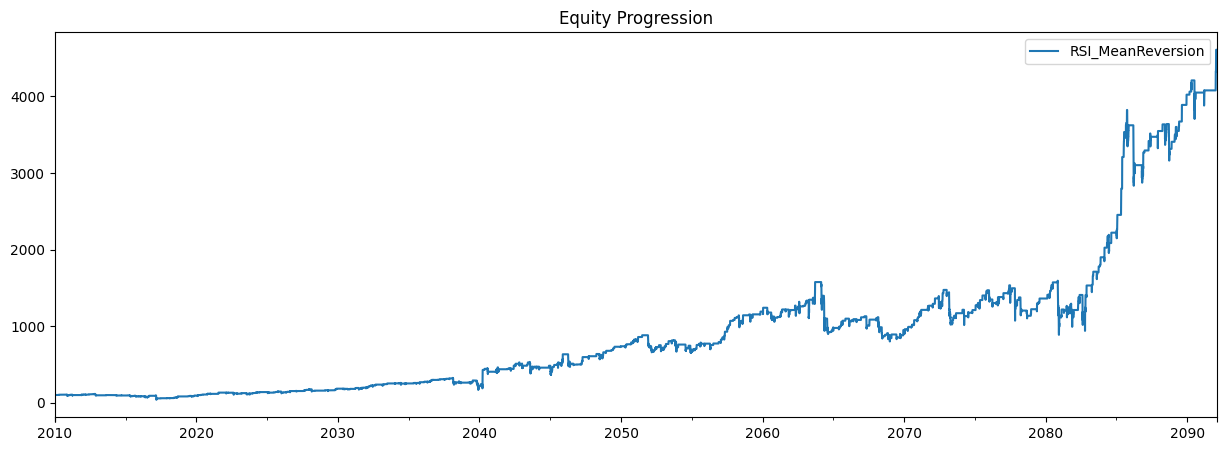

In [296]:
bt_result.plot()

In [318]:
day2.isna().sum()

day                    0
timestamp              0
product                0
bid_price_1            1
bid_volume_1           1
bid_price_2        12075
bid_volume_2       12075
bid_price_3        19987
bid_volume_3       19987
ask_price_1            0
ask_volume_1           0
ask_price_2        12326
ask_volume_2       12326
ask_price_3        19871
ask_volume_3       19871
mid_price              0
profit_and_loss        0
dtype: int64

In [375]:
def calculate_rsi(prices, n=14):
    """
    Calculate the Relative Strength Index (RSI) of a price series.
    
    Parameters:
        - prices (list or np.ndarray): List or array of price values.
        - n (int): Number of periods to use for RSI calculation (default: 14).
    
    Returns:
        - rsi (np.ndarray): Array of RSI values for each corresponding price.
    """
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up_periods = seed[seed >= 0].sum() / n
    down_periods = -seed[seed < 0].sum() / n
    rs = up_periods / down_periods
    rsi = np.zeros_like(prices)
    rsi[:n] = 100.0 - 100.0 / (1.0 + rs)
    
    for i in range(n, len(prices)):
        delta = deltas[i - 1]

        if delta > 0:
            up_periods = delta
            down_periods = 0
        else:
            up_periods = 0
            down_periods = -delta

        rs = (up_periods + (n - 1) * rs) / n
        rsi[i] = 100.0 - 100.0 / (1.0 + rs)

    return rsi

In [388]:
prices = [1,55.32, 56.12, 57.23, 56.76, 57.89, 57.81, 58.32, 57.59, 56.12, 56.23, 55.34, 56.78, 55.98]
rsi = calculate_rsi(prices, n=14)

In [389]:
rsi[-1]

93.04729094895083

In [385]:
stock_rsi = talib.RSI(pd.Series(prices)).to_frame()

In [386]:
stock_rsi

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


# Newton Rapson Implied Volatility

In [342]:
def f(sigma, S, K, r, T, option_type="call"):
    
    assert option_type in ["call", "put"], "option_type only accepts 'call' or 'put' as argument"
    
    d1 = (np.log(S/K) + (r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if option_type == "call":
        price = S*norm.cdf(d1,0,1) - K*np.exp(-r*T)*norm.cdf(d2,0,1)
        
        # print("To dynamically replicate payoff of the call at expiration,")
        # print("Delta: ", norm.cdf(d1,0,1))
        # print("B:", -K*np.exp(r*T)*norm.cdf(d2,0,1))
        print(f"price: {price}")

    return price

def f_prime(sigma, S, K, r, T):
    d1 = (np.log(S/K) + (r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    d1_prime = - (np.log(S/K))/((sigma**2)*np.sqrt(T)) - r*np.sqrt(T)/(sigma**2) + 1/2*np.sqrt(T)
    d2_prime = d1_prime - np.sqrt(T)
    
    price = S*NormalDist(0,1).pdf(d1)*d1_prime - K*np.exp(-r*T)*NormalDist(0,1).pdf(d2)*d2_prime
    print(f"f_price: {price}")
    return price

def newton_rapson_IV(guess, S, K, r, T, epsilon=1e-3, max_iterations=100):
    sigma_old = guess
    iterations = 0

    while iterations < max_iterations:
        sigma_new = sigma_old - f(sigma_old, S, K, r, T) / f_prime(sigma_old, S, K, r, T)
        print(sigma_new)
        if abs(sigma_new - sigma_old) < epsilon:
            return sigma_new
        
        # if iterations//100 == 0:
        #     print(sigma_new)
        sigma_old = sigma_new
        iterations += 1

    return 'None'  # If convergence is not achieved within max_iterations


newton_rapson_IV(0.3, 10000.0, 10000,0, 245/250)

price: 1180.4583559120183
f_price: 3906.0248956582877
-0.0022147547559535075
price: -8.746789192031429
f_price: 3949.324711765394
8.872008665922193e-10
price: 3.5038465284742415e-06
f_price: 3949.3270848342945
-2.9461508139807623e-17


-2.9461508139807623e-17

In [367]:
def bs_optionpricing(S, K, sigma, r, T, option_type="call"):
    
        assert option_type in ["call", "put"], "option_type only accepts 'call' or 'put' as argument"
        
        d1 = (np.log(S/K) + (r+(sigma**2)/2)*T)/(sigma*np.sqrt(T))
        d2 = d1 - sigma*np.sqrt(T)
        
        if option_type == "call":
            price = S*NormalDist(mu=0.0, sigma=1.0).cdf(d1) - K*np.exp(-r*T)*NormalDist(mu=0.0, sigma=1.0).cdf(d2)
            delta = NormalDist(mu=0.0, sigma=1.0).cdf(d1)
            # print("To dynamically replicate payoff of the call at expiration,")
            # print("Delta: ", np.exp(-delta*T)*NormalDist(mu=0.0, sigma=1.0).cdf(d1))
            # print("B:", -K*np.exp(r*T)*NormalDist(mu=0.0, sigma=1.0).cdf(d2))
            
        # elif option_type == "put":
        #     price = K*np.exp(-r*T)*NormalDist.cdf(-d2,0,1) - S*np.exp(-delta*T)*NormalDist.cdf(-d1)
            
            # print("To dynamically replicate payoff of the put at expiration,")
            # print("Delta: ", -np.exp(-delta*T)*NormalDist.cdf(d1,0,1))
            # print("B:", K*np.exp(r*T)*NormalDist.cdf(d2,0,1))

        return price, delta

def binary_search_parameter(target, S, K, r, T, left=0.0, right=1.0, epsilon=1e-6, max_iterations=1000):
    iteration = 0
    while iteration < max_iterations:
        mid = (left + right) / 2
        value = bs_optionpricing(S, K, mid, r, T)[0]

        if abs(value - target) < epsilon:
            return mid

        if value < target:
            left = mid
        else:
            right = mid

        iteration += 1

    return None  # If convergence is not achieved within max_iterations

binary_search_parameter(637.5, 10000, 10000, 0, 246/250)

0.16126326145604253

In [354]:
bs_optionpricing(10000,10000,0.16126326145604253,0,246/250)

(637.5000005793845, 0.5318750000289693)

In [363]:
option_underlying

,COCONUT_COUPON,COCONUT,implied_vol
0,637.5,10000.0,0.159968
1,637.5,9999.5,0.160034
2,637.5,9998.5,0.160170
3,638.5,9999.5,0.160287
4,637.5,9998.5,0.160170
...,...,...,...
29995,577.5,9883.5,0.160356
29996,577.5,9884.5,0.160228
29997,575.5,9883.5,0.159847
29998,575.5,9884.0,0.159785


In [ ]:
implied_vol_ = []
for i,val in enumerate(option_underlying.values):
    K = 10000
    S = val[1]
    call_price = val[0]
    r = 0
    T = ((10000-(i%10000))+245*10000)/(246*10000)
    implied_vol_.append(binary_search_parameter(call_price,
                                                S,
                                                10000,
                                                0,
                                                (246*10000-i)/(250*10000)))

# implied_vol_

In [369]:
option_underlying['binary_IV'] = implied_vol_

In [373]:
option_underlying['binary_IV'].std()

0.0034364302155112576

# Heston Model 

In [374]:
import numpy as np
from scipy.stats import norm

def heston_price(S, K, r, T, v0, kappa, theta, sigma, rho, option_type):
    # Define the Heston model parameters
    # S: Spot price
    # K: Strike price
    # r: Risk-free interest rate
    # T: Time to expiration
    # v0: Initial volatility
    # kappa: Mean reversion speed
    # theta: Long-term average volatility
    # sigma: Volatility of volatility
    # rho: Correlation between asset price and volatility
    # option_type: "call" or "put"

    # Define the characteristic function of the Heston model
    def characteristic_function(u):
        i = complex(0, 1)
        a = kappa * theta
        b = -0.5 * (u**2 + i * u)
        c = sigma**2
        d = np.sqrt((i * u * rho * sigma - kappa)**2 - c * (2 * i * u - u**2))
        r_plus = (b - i * u * rho * sigma + kappa + d) / (b - i * u * rho * sigma + kappa - d)
        r_minus = (b - i * u * rho * sigma + kappa - d) / (b - i * u * rho * sigma + kappa + d)
        g = r_minus / r_plus
        C = r_minus * np.exp(-d * T) / (kappa * (1 - g * np.exp(-d * T)))
        D = (1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T))
        return np.exp(a * T + b * v0 + i * u * np.log(S)) * C * np.exp(D * v0)

    # Define the integration function for calculating the option price
    def integrate(f, a, b, N):
        x, w = np.polynomial.legendre.leggauss(N)
        t = 0.5 * (x + 1) * (b - a) + a
        ft = f(t)
        return 0.5 * (b - a) * np.sum(w * ft)

    # Define the integrand for calculating the option price
    def integrand(u):
        i = complex(0, 1)
        return (np.exp(-i * u * np.log(K)) / (i * u)) * characteristic_function(u - i * 0.5)

    # Calculate the risk-neutral option price using numerical integration
    if option_type == "call":
        integrand_real = lambda u: np.real(integrand(u))
        price = S * (0.5 + integrate(integrand_real, 0, 100, 1000))
    elif option_type == "put":
        integrand_real = lambda u: np.real(integrand(u)) - (np.exp(np.log(K) * (1 - r * T)) / np.pi)
        price = S * (0.5 - integrate(integrand_real, 0, 100, 1000))
    else:
        raise ValueError("Invalid option_type. Must be 'call' or 'put'.")

    return price

# Example usage
S = 100  # Spot price
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration
v0 = 0.04  # Initial volatility
kappa = 2  # Mean reversion speed
theta = 0.04  # Long-term average volatility
sigma = 0.3  # Volatility of volatility
rho = -0.5  # Correlation between asset price and volatility
option_type = "call"  # Option type: "call" or "put"

price = heston_price(S, K, r, T, v0, kappa, theta, sigma, rho, option_type)
print("Option price:", price)

Option price: 126.02339722478462


# GARCH volatility forecast

In [420]:
option_underlying['binary_IV'].mean()

0.16090022222584424

In [415]:
day1

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,COCONUT,9999,200,NaN,NaN,NaN,NaN,10001,200,NaN,NaN,NaN,NaN,10000.0,0.0
1,1,0,COCONUT_COUPON,637,39,NaN,NaN,NaN,NaN,638,39,NaN,NaN,NaN,NaN,637.5,0.0
2,1,100,COCONUT,9999,104,9998.0,44.0,NaN,NaN,10000,104,10001.0,44.0,NaN,NaN,9999.5,0.0
3,1,100,COCONUT_COUPON,637,33,NaN,NaN,NaN,NaN,638,33,NaN,NaN,NaN,NaN,637.5,0.0
4,1,200,COCONUT,9998,133,9997.0,62.0,NaN,NaN,9999,133,10000.0,62.0,NaN,NaN,9998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,999700,COCONUT_COUPON,681,46,NaN,NaN,NaN,NaN,682,46,NaN,NaN,NaN,NaN,681.5,0.0
19996,1,999800,COCONUT_COUPON,681,43,NaN,NaN,NaN,NaN,682,43,NaN,NaN,NaN,NaN,681.5,0.0
19997,1,999800,COCONUT,10134,122,10133.0,65.0,NaN,NaN,10136,181,NaN,NaN,NaN,NaN,10135.0,0.0
19998,1,999900,COCONUT_COUPON,682,36,NaN,NaN,NaN,NaN,683,36,NaN,NaN,NaN,NaN,682.5,0.0


In [ ]:
import pandas as pd
from arch import arch_model
from random import gauss
from random import seed
seed(1)

# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

In [403]:
price_coco = combine_df[combine_df['product']=='COCONUT']['mid_price'].reset_index(drop=True)
tmr_price_coco = price_coco.shift(-1)
ret = np.log(tmr_price_coco/price_coco)

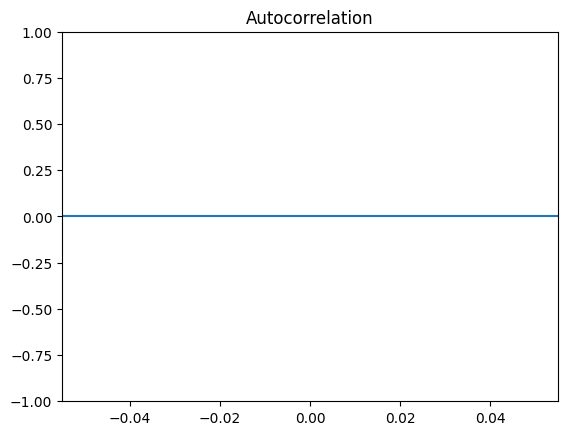

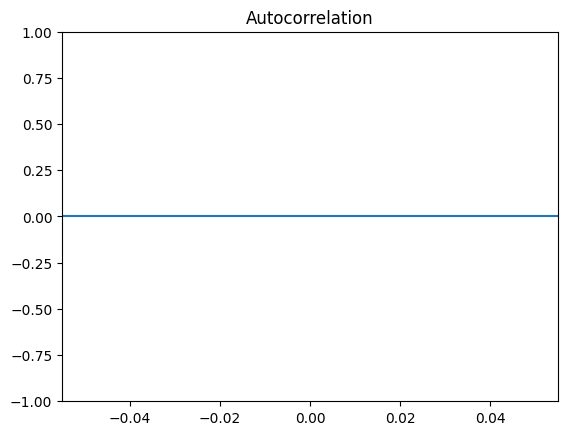

In [407]:
from statsmodels.graphics.tsaplots import plot_acf

squared_data = price_coco.pct_change()**2
# create acf plot
plot_acf(squared_data)